In [69]:
import pandas as pd

datos = pd.read_csv("./clima_historico_chiriqui.csv")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              888 non-null    object 
 1   datetime          888 non-null    object 
 2   temp              888 non-null    float64
 3   feelslike         888 non-null    float64
 4   dew               888 non-null    float64
 5   humidity          888 non-null    float64
 6   precip            888 non-null    float64
 7   precipprob        888 non-null    int64  
 8   preciptype        592 non-null    object 
 9   snow              888 non-null    int64  
 10  snowdepth         888 non-null    int64  
 11  windgust          888 non-null    float64
 12  windspeed         888 non-null    float64
 13  winddir           888 non-null    float64
 14  sealevelpressure  888 non-null    float64
 15  cloudcover        888 non-null    float64
 16  visibility        888 non-null    float64
 1

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'windgust'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'sealevelpressure'}>],
       [<Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'solarradiation'}>,
        <Axes: title={'center': 'solarenergy'}>,
        <Axes: title={'center': 'uvindex'}>],
       [<Axes: title={'center': 'severerisk'}>,
        <Axes: title={'center': 'Overcast'}>,
        <Axes: title={'center': 'Partially cloudy'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain, Overcast'}>],
       [<Axes: title={'center': 'Rain, Partially clo

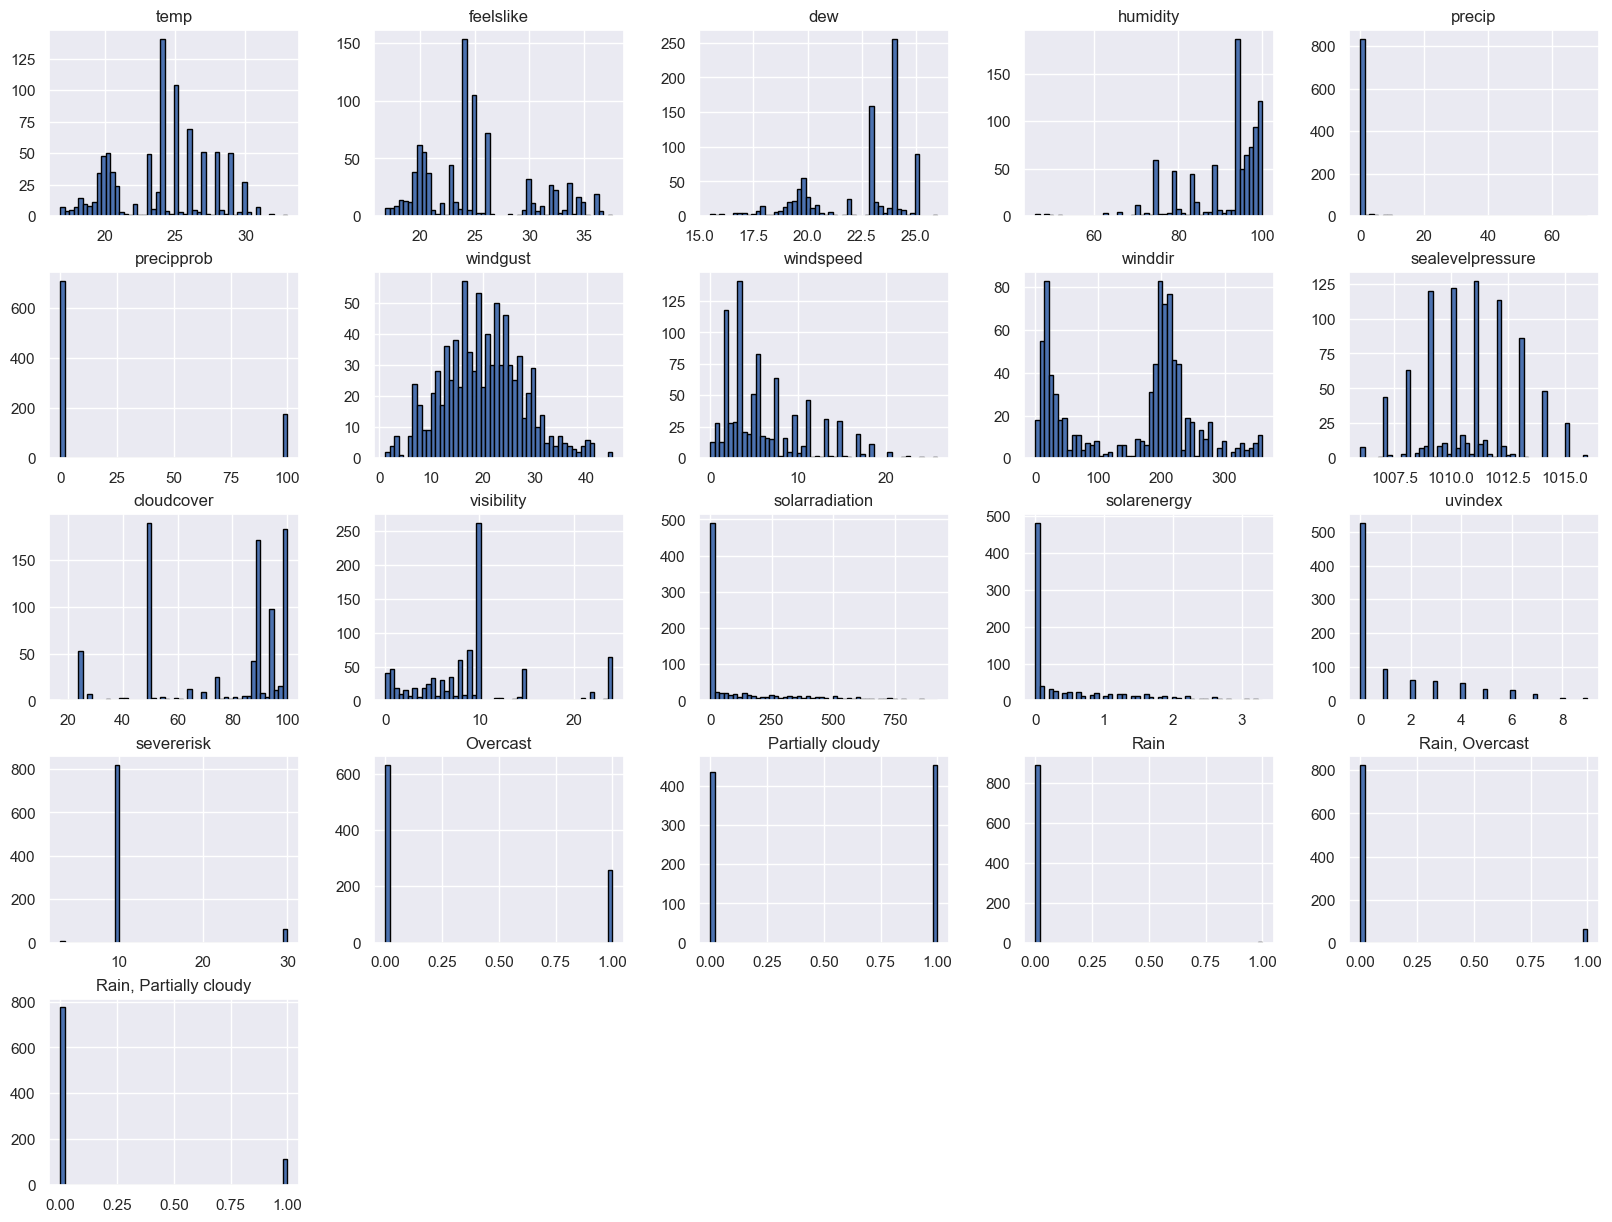

In [70]:
datos = datos.drop(['name','stations','icon', 'snow','snowdepth'], axis=1)

datos_datetime = datos["datetime"]
datos = datos.drop('datetime', axis=1)

# datos['preciptype'].value_counts()
# dummies = pd.get_dummies(datos['preciptype'], dtype=int)
# datos = pd.concat([datos, dummies], axis=1)
datos = datos.drop('preciptype', axis=1)

datos['conditions'].value_counts()
dummies = pd.get_dummies(datos['conditions'], dtype=int)
datos = pd.concat([datos, dummies], axis=1)
datos = datos.drop('conditions', axis=1)

datos.hist(bins=50, figsize=(20,15), edgecolor='black')

<Axes: >

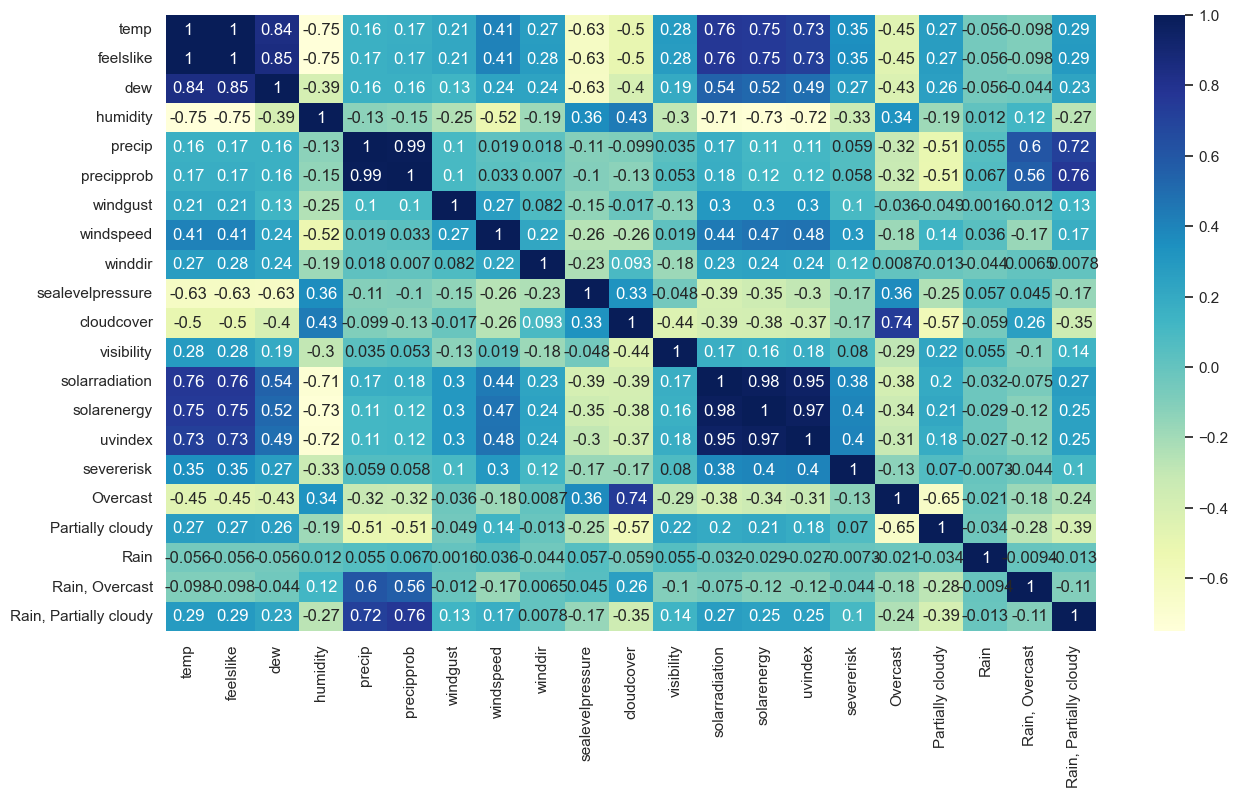

In [71]:
import seaborn as sb

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr('spearman'), annot=True, cmap='YlGnBu' )

In [72]:
datos["datetime"] = datos_datetime


datos_nivel_rio = pd.read_csv("./nivel_rio.csv")
datos_nivel_rio

datos_nivel_rio['datetime'] = pd.to_datetime(datos_nivel_rio['dia'], format='%Y-%m-%d %H:%M:%S')
datos_nivel_rio['hour'] = datos_nivel_rio['datetime'].dt.floor('H')

datos['datetime'] = pd.to_datetime(datos['datetime'], format='%Y-%m-%dT%H:%M:%S')

merged_df = pd.merge(datos_nivel_rio, datos, left_on='hour', right_on='datetime', how='inner')

print(merged_df.head())

merged_df.to_csv("./datos_modelo_chiriqui.csv")

       timestamp                  dia  nivel          datetime_x  \
0  1731024000000  2024-11-07 18:00:00   1.14 2024-11-07 18:00:00   
1  1731024900000  2024-11-07 18:15:00   1.13 2024-11-07 18:15:00   
2  1731025800000  2024-11-07 18:30:00   1.12 2024-11-07 18:30:00   
3  1731026700000  2024-11-07 18:45:00   1.10 2024-11-07 18:45:00   
4  1731027600000  2024-11-07 19:00:00   1.09 2024-11-07 19:00:00   

                 hour  temp  feelslike   dew  humidity  precip  ...  \
0 2024-11-07 18:00:00  25.0       25.0  24.0     94.19     0.0  ...   
1 2024-11-07 18:00:00  25.0       25.0  24.0     94.19     0.0  ...   
2 2024-11-07 18:00:00  25.0       25.0  24.0     94.19     0.0  ...   
3 2024-11-07 18:00:00  25.0       25.0  24.0     94.19     0.0  ...   
4 2024-11-07 19:00:00  25.0       25.0  24.0     94.46     8.0  ...   

   solarradiation  solarenergy  uvindex  severerisk  Overcast  \
0            40.1          0.1        0          10         0   
1            40.1          0.1    

/var/folders/fm/520q9b2j69gg0yrj_8m89nhr0000gp/T/ipykernel_57420/1104926447.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datos_nivel_rio['hour'] = datos_nivel_rio['datetime'].dt.floor('H')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nivel                   2801 non-null   float64
 1   temp                    2801 non-null   float64
 2   feelslike               2801 non-null   float64
 3   dew                     2801 non-null   float64
 4   humidity                2801 non-null   float64
 5   precip                  2801 non-null   float64
 6   precipprob              2801 non-null   int64  
 7   windgust                2801 non-null   float64
 8   windspeed               2801 non-null   float64
 9   winddir                 2801 non-null   float64
 10  sealevelpressure        2801 non-null   float64
 11  cloudcover              2801 non-null   float64
 12  visibility              2801 non-null   float64
 13  solarradiation          2801 non-null   float64
 14  solarenergy             2801 non-null   

<Axes: >

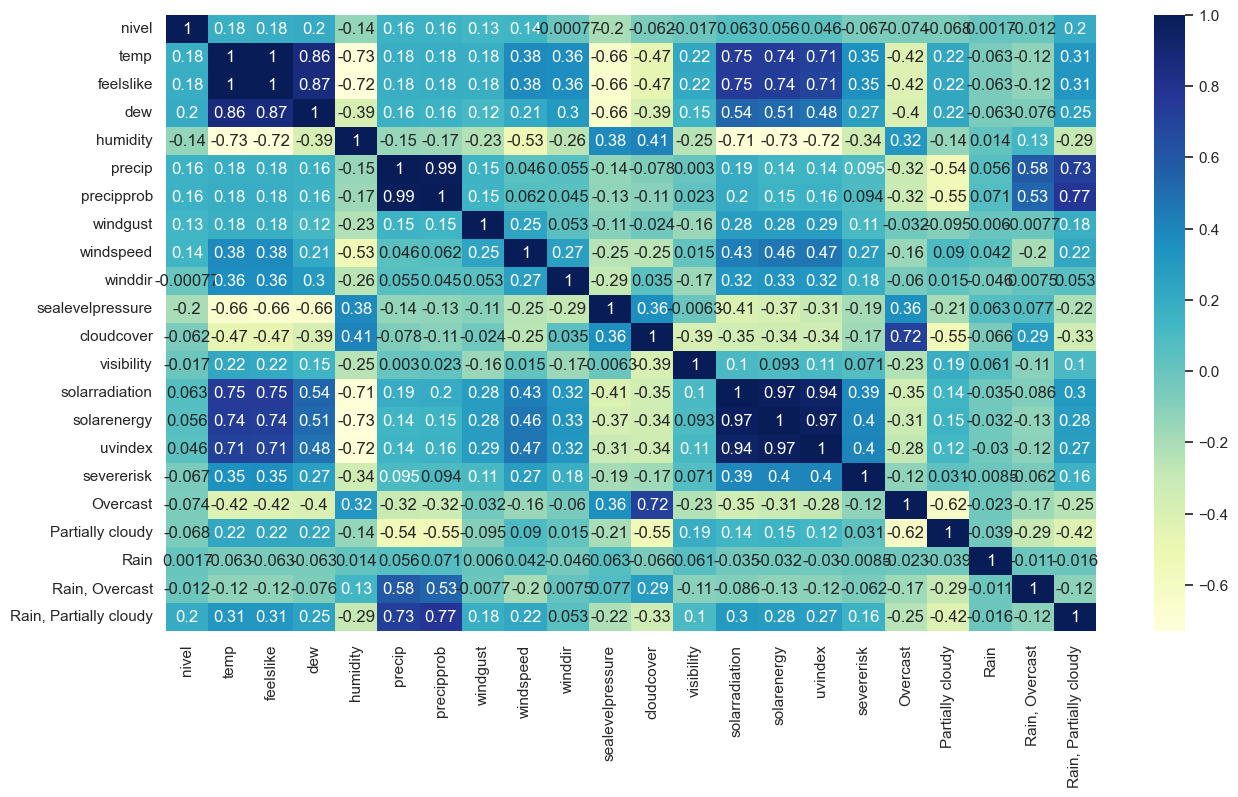

In [76]:
merged_df = merged_df.drop(["timestamp","datetime_x", "datetime_y", "dia", "hour"], axis=1)
print(merged_df.info())
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=merged_df.corr('spearman'), annot=True, cmap='YlGnBu' )